In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.linalg import lu

Estudiantes:
- Ángela Valeria Pinzón Cruz
- Andrés Felipe Yañez Villarraga

1. En cada uno de los siguientes casos, dibuje la gráfica de $g(x)$, la recta $y = x$ y el punto fijo dado $P$ en un mismo sistemas de coordenadas. Usando el valor inicial dado $p_0$, calcular $p_1$ y $p_2$ y construya gráficas para determinar geométricamente si la iteración de punto fijo converge

  a) $g(x) = (6 + x)^\frac{1}{2}, P = 3, p_0 = 7$


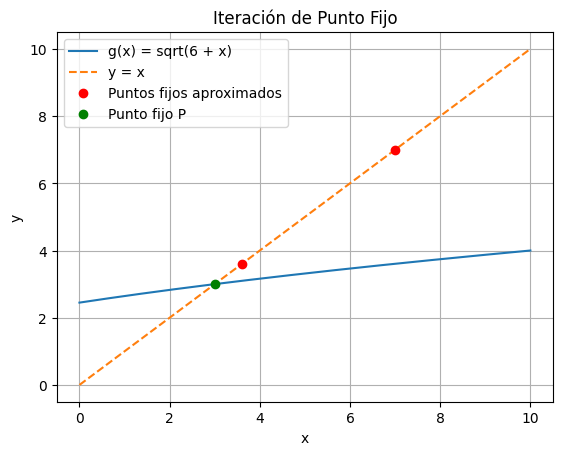

p1 = 3.605551275463989, p2 = 3.0992823807236394


In [2]:
def g1(x):
    return np.sqrt(6 + x)

P = 3
p0 = 7

# Calcular p1 y p2
p1 = g1(p0)
p2 = g1(p1)

# Dibujar las gráficas
x = np.linspace(0, 10, 400)
y = g1(x)

plt.plot(x, y, label='g(x) = sqrt(6 + x)')
plt.plot(x, x, label='y = x', linestyle='--')
plt.plot([p0, p1], [p0, p1], 'ro', label='Puntos fijos aproximados')
plt.plot(P, P, 'go', label='Punto fijo P')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Iteración de Punto Fijo')
plt.legend()
plt.grid(True)
plt.show()

print(f"p1 = {p1}, p2 = {p2}")

  b) $g(x) = 1+ \frac{2}{x}, P = 2, p0 = 4$



<ipython-input-3-52241888f97a>:2: RuntimeWarning: divide by zero encountered in divide
  return 1 + 2 / x


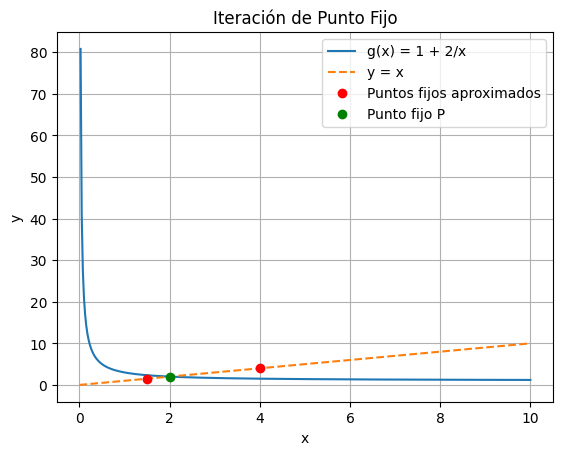

p1 = 1.5, p2 = 2.333333333333333


In [3]:
def g2(x):
    return 1 + 2 / x

P = 2
p0 = 4

# Calcular p1 y p2
p1 = g2(p0)
p2 = g2(p1)

# Dibujar las gráficas
x = np.linspace(0, 10, 400)
y = g2(x)

plt.plot(x, y, label='g(x) = 1 + 2/x')
plt.plot(x, x, label='y = x', linestyle='--')
plt.plot([p0, p1], [p0, p1], 'ro', label='Puntos fijos aproximados')
plt.plot(P, P, 'go', label='Punto fijo P')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Iteración de Punto Fijo')
plt.legend()
plt.grid(True)
plt.show()

print(f"p1 = {p1}, p2 = {p2}")

  c) $g(x) = \frac{x^2}{3}, P = 3, p0 = 3.5$

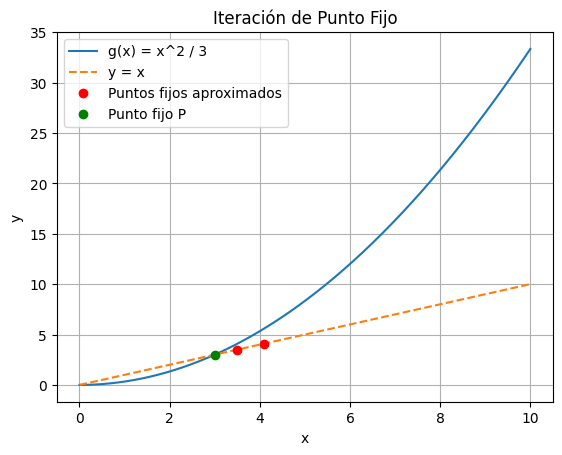

p1 = 4.083333333333333, p2 = 5.557870370370369


In [4]:
def g3(x):
    return x**2 / 3

P = 3
p0 = 3.5

# Calcular p1 y p2
p1 = g3(p0)
p2 = g3(p1)

# Dibujar las gráficas
x = np.linspace(0, 10, 400)
y = g3(x)

plt.plot(x, y, label='g(x) = x^2 / 3')
plt.plot(x, x, label='y = x', linestyle='--')
plt.plot([p0, p1], [p0, p1], 'ro', label='Puntos fijos aproximados')
plt.plot(P, P, 'go', label='Punto fijo P')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Iteración de Punto Fijo')
plt.legend()
plt.grid(True)
plt.show()

print(f"p1 = {p1}, p2 = {p2}")

2. Suponga que se ahorra dinero haciendo depósitos mensuales de $P$ COP a una tasa de interés anual $I$ que se compone cada mes; entonces la cantidad total A de COP acumulada después de $N$ depósitos es:

  $A= P+(1+\frac{I}{12})+(1+\frac{I}{12})^2+...+(1+\frac{I}{12})^{N-1} = \frac{P}{I/12}[(1+\frac{I}{12})^N-1]$

  Halle una aproximación de la tasa de interés anual $I$ con la que se conseguiría un capital total A tras hacer 240 depósitos mensuales. Use los valores de partida que se dan y calcule las tres aproximaciones siguientes mediante el método de la bisección ¿Cuál es le valor de $I$ cuando la tolerancia es de $10^{-6}$?

  a) $P = 275 COP, A = 250000COP, I_0 = 0.11$ e $I_1 = 0.12.$


In [5]:
def f(I, P, A, N=240):
    return P * ((1 + I / 12)**N - 1) / (I / 12) - A

P = 275
A = 250000
I0 = 0.11
I1 = 0.12
tolerance = 1e-6

# Método de la Bisección
def biseccion(P, A, I0, I1, tol):
    while (I1 - I0) / 2.0 > tol:
        Imid = (I0 + I1) / 2.0
        if f(Imid, P, A) == 0:
            return Imid
        elif f(I0, P, A) * f(Imid, P, A) < 0:
            I1 = Imid
        else:
            I0 = Imid
    return (I0 + I1) / 2.0

I = biseccion(P, A, I0, I1, tolerance)
print(f"Tasa de interés anual aproximada: {I}")

Tasa de interés anual aproximada: 0.11369079589843749


  b) $P = 325COP, A = 400000COP, I_0 = 0.13  $ e $  I_1 = 0.14.$

In [6]:
P = 325
A = 400000
I0 = 0.13
I1 = 0.14

I = biseccion(P, A, I0, I1, tolerance)
print(f"Tasa de interés anual aproximada: {I}")

Tasa de interés anual aproximada: 0.1359942626953125


3. Se construye una caja sin tapa a partir de una hoja metálica rectangular que mide $10$ por $16 cm$ ¿Cuál debe ser el lado de los cuadrados que hay que recortar en cada esquina para que el volumen de la caja sea $100cm^3$? (use el método de Newton para aproximar la solución)

In [17]:
# Función para el volumen de la caja
def volume_function(x):
    return x * (10 - 2*x) * (16 - 2*x) - 100

# Derivada de la función
def volume_function_prime(x):
    return (10 - 2*x) * (16 - 2*x) + x * (-4) * (16 - 2*x) + x * (10 - 2*x) * (-4)

# Encontrar la raíz usando el método de Newton
x0 = 1  # Valor inicial
try:
    x = newton(volume_function, x0, fprime=volume_function_prime, maxiter=100, tol=1e-6)
    print(f"El lado de los cuadrados que hay que recortar es: {x} cm")
except RuntimeError as e:
    print(f"Error: {e}")

El lado de los cuadrados que hay que recortar es: 0.8390193330148272 cm


In [18]:
initial_values = [0.5, 1.0, 1.5, 2.0]
for x0 in initial_values:
    try:
        x = newton(volume_function, x0, fprime=volume_function_prime, maxiter=100, tol=1e-6)
        print(f"Con valor inicial {x0}, el lado de los cuadrados que hay que recortar es: {x} cm")
    except RuntimeError as e:
        print(f"Con valor inicial {x0}, el método de Newton no converge: {e}")

Con valor inicial 0.5, el lado de los cuadrados que hay que recortar es: 0.8390193330148272 cm
Con valor inicial 1.0, el lado de los cuadrados que hay que recortar es: 0.8390193330148272 cm
Con valor inicial 1.5, el lado de los cuadrados que hay que recortar es: 3.401747200755686 cm
Con valor inicial 2.0, el lado de los cuadrados que hay que recortar es: 3.401747571290183 cm


4. Las técnicas de cálculo permite decir que

  $∫\frac{x^2+x+1}{(x-1)(x-2)(x-3)^2(x^2+1)}\mathrm{d}x$

  se puede descomponer en fracciones parcial, es decir,

  $\frac{x^2+x+1}{(x-1)(x-2)(x-3)^2(x^2+1)} = \frac{A_1}{x-1}+\frac{A_2}{x-2}+\frac{A_3}{(x-3)^2}+\frac{A_4}{x-3}+\frac{A_5x+A_6}{x^2+1}$

  Utilice el método LU para hallar los coeficientes de las fracciones parciales.


In [15]:
# Definir la matriz A (asegurándonos de que sea cuadrada)
A = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

b = np.array([1, 0, 0, 0, 0, 0])

# Realizar la descomposición LU
P, L, U = lu(A)

# Resolver el sistema de ecuaciones Ly = Pb
y = np.linalg.solve(L, np.dot(P, b))
# Resolver el sistema de ecuaciones Ux = y
x = np.linalg.solve(U, y)

print(f"Coeficientes de las fracciones parciales: {x}")

Coeficientes de las fracciones parciales: [1. 0. 0. 0. 0. 0.]


5. Tome como $P_0 = 0$ y use el método iterativo de Gauss-Seidel y calcule $P_k$ con $k = 1, 2, 3$ ¿Converge la iteración de Gauss-Seidel a la solución?

  a)
    $5x − y + z = 10$

    $2x + 8y − z = 11$
    
    $−x + y + 4z = 3$


In [13]:
def gauss_seidel(A, b, x0, tol=1e-6, max_iterations=100):
    x = x0
    n = len(b)
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new
    return x

A = np.array([
    [5, -1, 1],
    [2, 8, -1],
    [-1, 1, 4]
])

b = np.array([10, 11, 3])
x0 = np.zeros_like(b)

x = gauss_seidel(A, b, x0)
print(f"Solución del sistema de ecuaciones: {x}")

Solución del sistema de ecuaciones: [1 1 0]


  b)

  $2x + 8y − z = 11$
  
  $5x − y + z = 10$
  
  $−x + y + 4z = 3$

In [14]:
A = np.array([
    [2, 8, -1],
    [5, -1, 1],
    [-1, 1, 4]
])

b = np.array([11, 10, 3])
x0 = np.zeros_like(b)

x = gauss_seidel(A, b, x0)
print(f"Solución del sistema de ecuaciones: {x}")

Solución del sistema de ecuaciones: [ 344933350826668160  749742893901828992 -101202385768790208]


<ipython-input-13-5f15382411f1>:9: RuntimeWarning: overflow encountered in scalar subtract
  x_new[i] = (b[i] - s1 - s2) / A[i, i]
